In [18]:
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df1 = pd.read_csv('cleaned_data_set.csv')
df1.head(10)

,Unnamed: 0.1,Unnamed: 0,inst_type,detained_sentenced,sentence_len,current_custody_start,current_crime,age,date_first_adult_incarc,zipcode,...,Elementary_School_Expelled,Middle_School_Expelled,High_School_Expelled,Elementary_School_Suspended_Where,Middle_School_Suspended_Where,High_School_Suspended_Where,Suspended_Reason,Schools_Attended,School_Experience,Survey_Reaction
0,0,0,County Jail,Detained,Not Answered,2020-09-30,awaiting trial for probation violation,38,26,2127.0,...,no,no,yes,Not Answered,Not Answered,out-of-school,fighting girls and being mean,"St. Margarets elementary and middle, Monsignor...","No, I was a straight A student until my dad di...",With more drug programs for us to sign up for ...
1,1,1,County Jail,Sentenced,2 9 months run concurrent,2020-07-21,Both are possession of Class A + B,22,18,3064.0,...,no,no,yes,Not Answered,"in-school, out-of-school","in-school, out-of-school","talking back, skipping, food fight, smoking, w...",Amherst NH elementary (forget the name) 2 elem...,I was a phenomenal student that had so much po...,Thank you guys very much for doing this. I thi...
2,2,2,County Jail,Detained,Not Answered,2020-05-02,"4th OUI, OUI bodily injury",33,23 1/2,2130.0,...,no,no,no,Not Answered,Not Answered,Not Answered,N/A (Good luck with school),"Lafayette Elementary School, Everett, MA; Marg...","I never went to high school, I got my GED",Thank you. Happy Holidays.
3,3,3,State Prison,Detained,Not Answered,2020-07-21,"Domestic, reckless endangerment, intimidation ...",34,34,2188.0,...,no,no,no,Not Answered,Not Answered,"in-school, out-of-school","I skipped class a bunch of times, I beat up an...","William Seach School, Abigail Adams School, We...",Not Answered,Not Answered
4,4,4,County Jail,Sentenced,2 years,2019-11-15,indecent A&B,28,27,2150.0,...,no,no,yes,Not Answered,Not Answered,out-of-school,skipping school,"Chelsea Public School K-12, and Youthbuild jus...",Youthbuild was the best thing that ever happen...,"Invest in Youhtbuild Programs, they change lives"
5,5,5,County Jail,Detained,Not Answered,2017-07-19,1st degree murder,28,25 years old,1902.0,...,no,no,no,Not Answered,"in-school, out-of-school",Not Answered,"fighting, talking back, skip class, and gettin...","Witchcraft Elementary, E.J. Harrington element...",No,You're welcome
6,6,6,County Jail,Detained,Not Answered,2020-03-05,"firearm, kidnapping, suffocation, assault w/ i...",34,2 years ago,2532.0,...,no,no,no,Not Answered,Not Answered,in-school,"behavior, piercing belly buttons, skipping cla...","Falmouth Elementary, Peebles Middle School, Up...",Not Answered,"For question 28, the respondent wrote ""Yes, no..."
7,7,7,County Jail,Detained,Not Answered,2020-09-26,probation violation,31,19,3063.0,...,no,no,no,Not Answered,Not Answered,Not Answered,Not Answered,"Broad St. Pennichuck Elm, Nashua North",I enjoyed school.,I hope this helps our future child generation.
8,8,8,County Jail,Detained,Not Answered,2020-09-30,"assault, possession of class A, theft of a mot...",30,2017,2359.0,...,no,no,no,Not Answered,Not Answered,"in-school, out-of-school",fighting,"Hobomock Elementary School, Silver Lake Junior...",Not Answered,Not Answered
9,9,9,County Jail,Detained,Not Answered,2020-09-07,a firearm,18,this is my first incarceration,2130.0,...,no,no,yes,Not Answered,out-of-school,out-of-school,fights,Evertt Ewards\nTrinity Middle School\nEMK (Hig...,No,The system says it's made to help people when ...


In [20]:
df = df1[['arrested_under18', 'lived_with_mental_unstable', 'lived_with_alcoholic', 'lived_with_drug_addict', 'live_with_servedtime_sentenced', 'adult_physically_hurt_you', 'adult_physically_hurt_eachother']]

In [21]:
df.isnull().sum()

arrested_under18                   0
lived_with_mental_unstable         0
lived_with_alcoholic               0
lived_with_drug_addict             0
live_with_servedtime_sentenced     0
adult_physically_hurt_you          0
adult_physically_hurt_eachother    0
dtype: int64

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 919.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 919.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 919.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 919.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 919.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 46, cost: 567.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 47, cost: 570.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, 

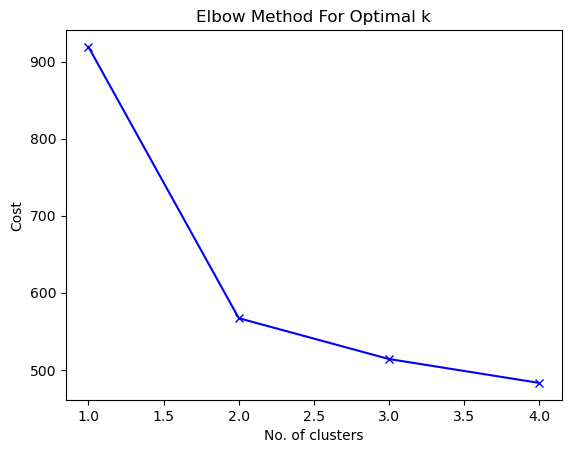

In [22]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df)
print(clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 30, cost: 570.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 17, cost: 567.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 28, cost: 567.0
Run 3, iteration: 2/100, moves: 5, cost: 567.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 101, cost: 578.0
Run 4, iteration: 2/100, moves: 29, cost: 570.0
Run 4, iteration: 3/100, moves: 7, cost: 570.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 32, cost: 567.0
Best run was number 2
[1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 

In [24]:
print(kmode.cluster_centroids_)

[['No' 'No' 'No' 'No' 'No' 'Never' 'Never']
 ['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'A few times a month'
  'A few times a month']]


In [25]:
df.insert(0, "Cluster", clusters, True)
df.head(10)

,Cluster,arrested_under18,lived_with_mental_unstable,lived_with_alcoholic,lived_with_drug_addict,live_with_servedtime_sentenced,adult_physically_hurt_you,adult_physically_hurt_eachother
0,1,Yes,Yes,Yes,Yes,Yes,Never,Never
1,1,No,Yes,Yes,Yes,Yes,Never,Never
2,0,Yes,No,No,No,No,A few times a month,Never
3,1,Yes,Yes,Yes,Yes,No,2-3 times a week,2-3 times a week
4,0,No,Yes,No,No,No,About once per year,Never
5,0,No,I don't know,I don't know,I don't know,No,Never,Never
6,0,No,Yes,Yes,Yes,No,Never,Not Answered
7,0,Yes,I don't know,No,No,No,A few times a month,About once per year
8,0,No,No,No,No,No,Never,Never
9,0,Yes,I don't know,No,No,Yes,Never,Never


In [26]:
df['Cluster'].value_counts()

0    162
1    103
Name: Cluster, dtype: int64

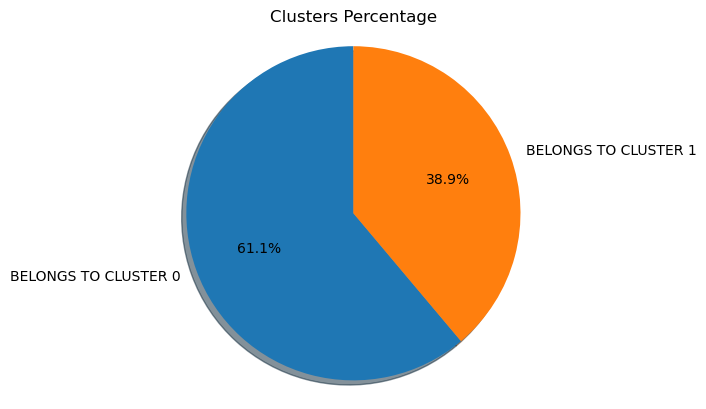

In [34]:
from itertools import count

x_axis = [162,103]
labels = ['BELONGS TO CLUSTER 0','BELONGS TO CLUSTER 1' ]
plt.pie(x_axis, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Clusters Percentage')
plt.axis('equal')
plt.show()

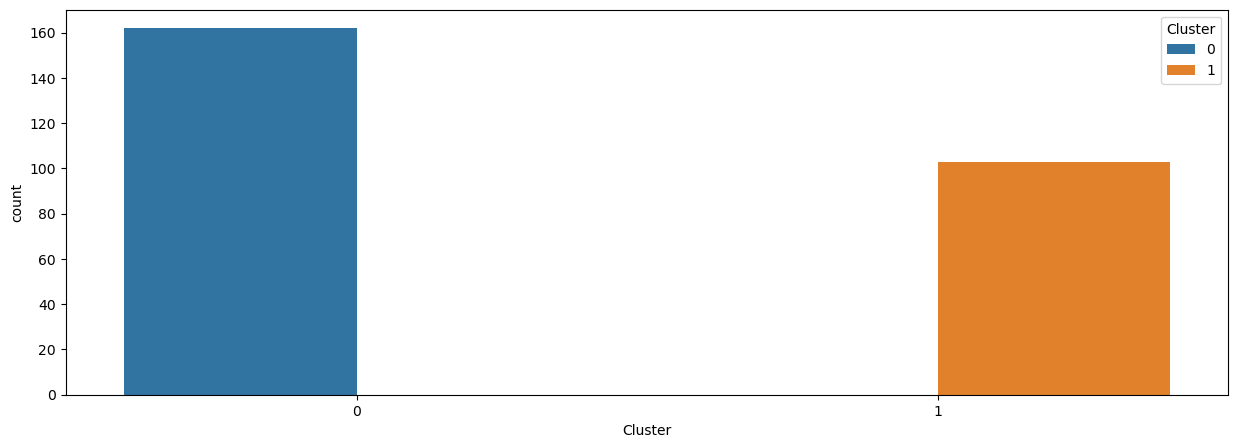

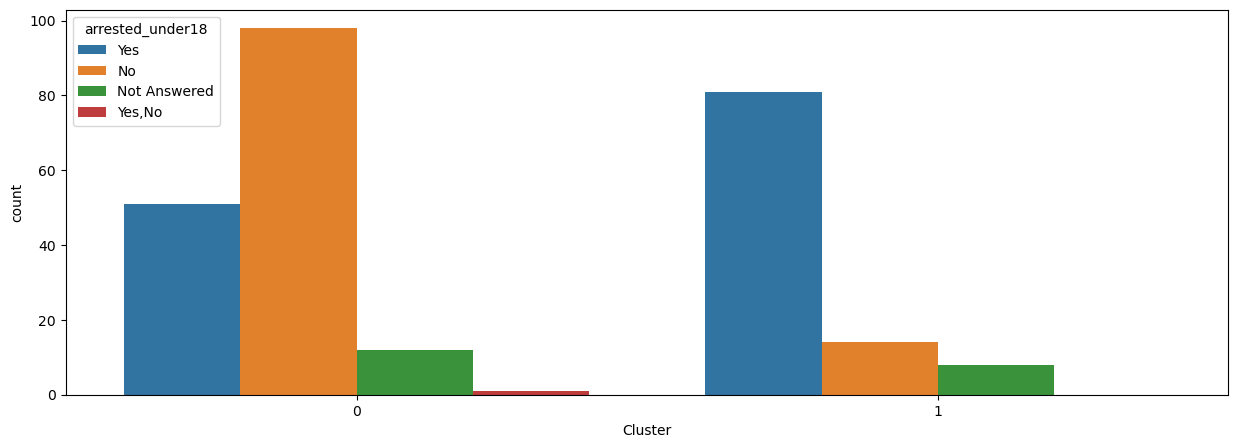

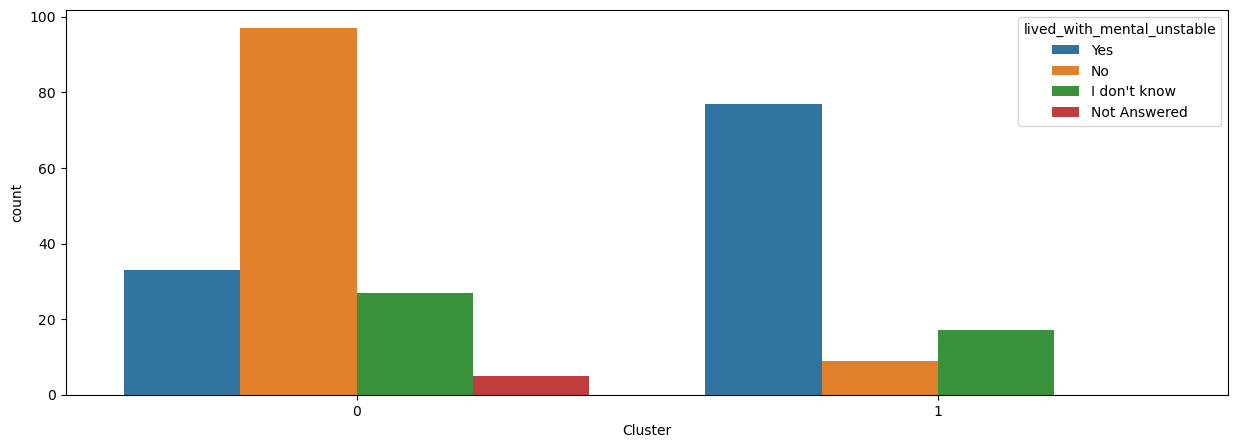

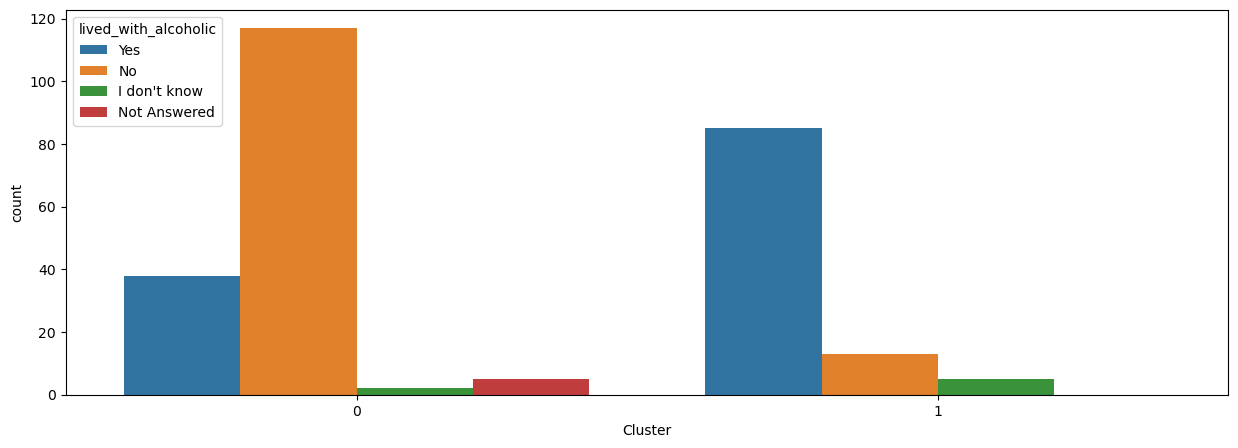

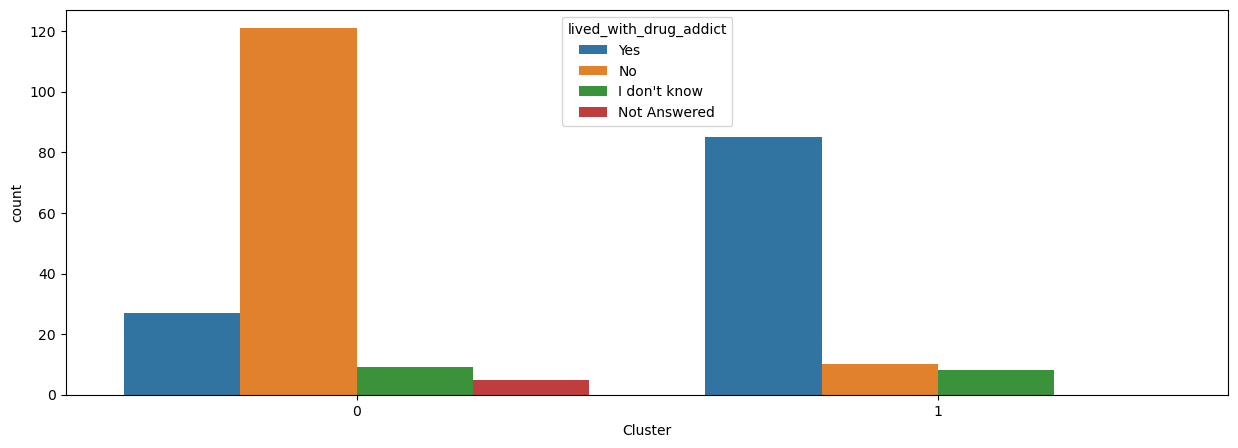

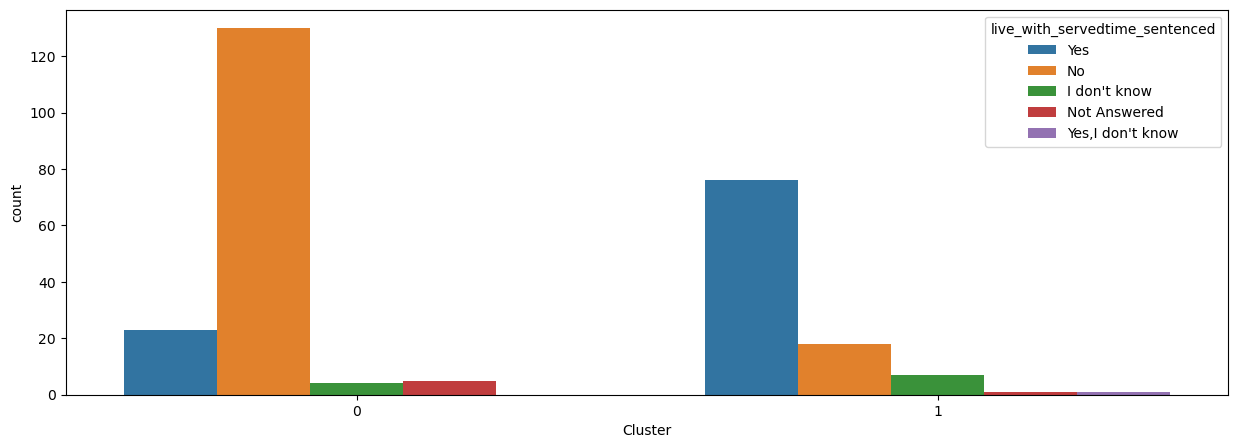

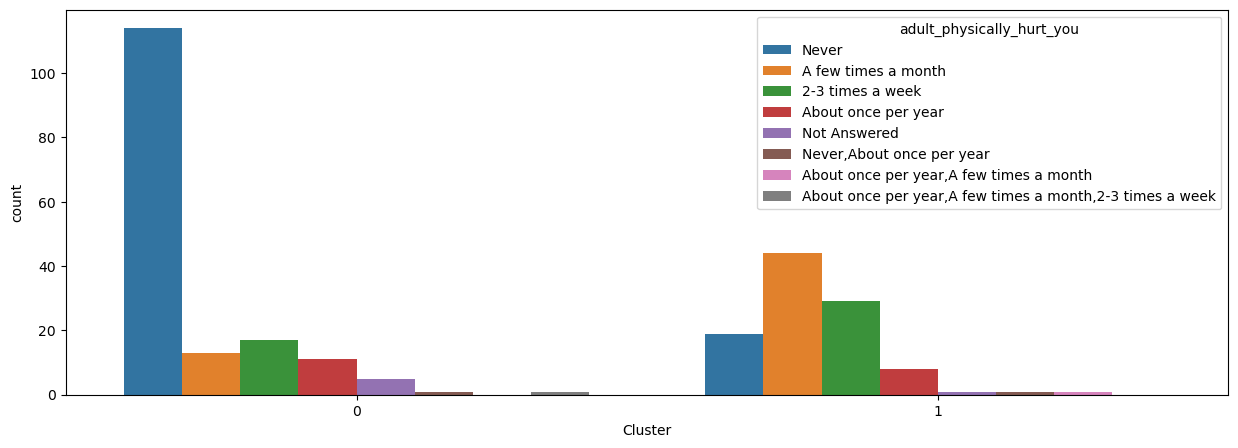

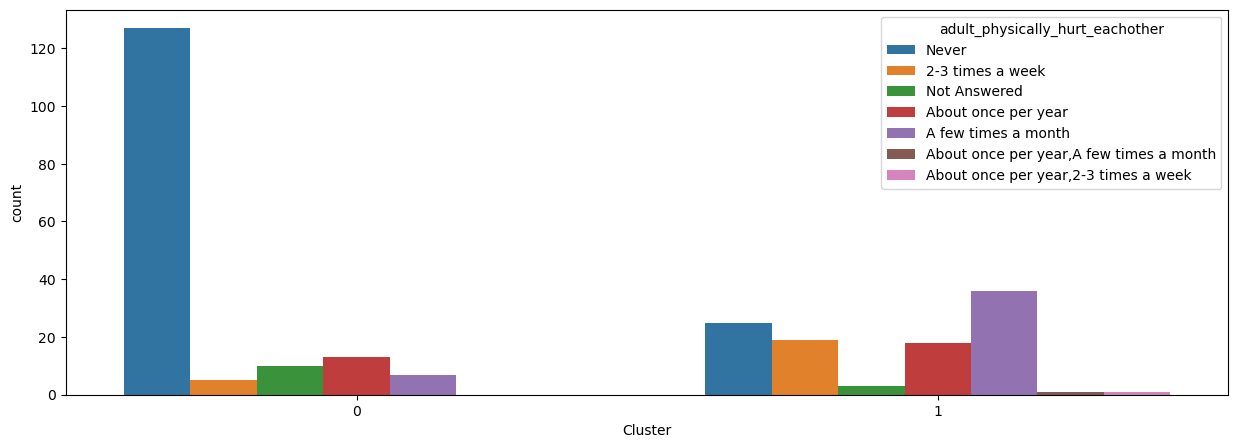

In [29]:
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
#fig = plt.figure()
for col in df:
    plt.subplots(figsize = (15,5))
    X = sns.countplot(x='Cluster',hue=col, data = df)
    plt.show()
    scatter_fig = X.get_figure()
#     fig.savefig("out.png")
    #X.savefig("sns-heatmap.png")
    scatter_fig.savefig('scatterplot.pdf')

In [31]:
df[df['Cluster'] == 0].head(10)

,Cluster,arrested_under18,lived_with_mental_unstable,lived_with_alcoholic,lived_with_drug_addict,live_with_servedtime_sentenced,adult_physically_hurt_you,adult_physically_hurt_eachother
2,0,Yes,No,No,No,No,A few times a month,Never
4,0,No,Yes,No,No,No,About once per year,Never
5,0,No,I don't know,I don't know,I don't know,No,Never,Never
6,0,No,Yes,Yes,Yes,No,Never,Not Answered
7,0,Yes,I don't know,No,No,No,A few times a month,About once per year
8,0,No,No,No,No,No,Never,Never
9,0,Yes,I don't know,No,No,Yes,Never,Never
16,0,Yes,No,Yes,I don't know,No,Never,Never
18,0,No,I don't know,No,No,No,Never,Never
19,0,No,No,No,No,No,About once per year,A few times a month


In [33]:
df[df['Cluster'] == 1].head(10)

,Cluster,arrested_under18,lived_with_mental_unstable,lived_with_alcoholic,lived_with_drug_addict,live_with_servedtime_sentenced,adult_physically_hurt_you,adult_physically_hurt_eachother
0,1,Yes,Yes,Yes,Yes,Yes,Never,Never
1,1,No,Yes,Yes,Yes,Yes,Never,Never
3,1,Yes,Yes,Yes,Yes,No,2-3 times a week,2-3 times a week
10,1,No,Yes,Yes,Yes,No,2-3 times a week,A few times a month
11,1,Yes,Yes,Yes,Yes,Yes,A few times a month,A few times a month
12,1,Yes,Yes,Yes,Yes,Yes,A few times a month,A few times a month
13,1,Yes,Yes,Yes,Yes,Yes,2-3 times a week,2-3 times a week
14,1,Yes,No,Yes,Yes,Yes,A few times a month,About once per year
15,1,Yes,Yes,Yes,Yes,Yes,A few times a month,About once per year
17,1,No,Yes,Yes,Yes,Yes,2-3 times a week,2-3 times a week
